In [1]:
%run training_functions.ipynb

/home/ac.cdavies/.vnv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-04-15 20:13:58.930959: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744748038.945619  194212 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744748038.949816  194212 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744748038.961632  194212 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 

{'record': Value(dtype='string', id=None), 'text': Value(dtype='string', id=None)}
{'text': Value(dtype='string', id=None)}
{'text': Value(dtype='string', id=None)}
['train', 'validation', 'test']
['train', 'validation', 'test']
In, Out, get_ipython, exit, quit, open, accelerate, datasets, evaluate, math, np, os, peft, pickle, pytest, ipytest, pd, transformers, torch, time, threading, load_dataset, load_dataset_builder, get_dataset_split_names, get_dataset_config_names, LoftQConfig, LoraConfig, get_peft_model, AutoModelForCausalLM, AutoTokenizer, pipeline, TrainingArguments, Trainer, SFTTrainer, SFTConfig, @py_builtins, @pytest_ar, model_from_pkl, ds_builder1, ds_builder2, ds_builder3, ds_gs, csv, ds_gst1_train, ds_gst1_test, ds_gst2_train, ds_gst2_test, tsv_headers, genome_list, temp_list, i, tsvfile, tsv_writer, search_with_strings, map_data, print_trainable_parameters, metric, initialize_heartbeat, heartbeat, end_heartbeat, comp_metrics_output, compute_metrics, make_trainer, get_dat

## Imported Functions
1. model_from_pkl(model): extracts ML model from pkl file
2. map_data(data, model, tokenizer): performs preprocessing/tokenization on data
3. make_trainer(m_model, train_data, test_data, config, args): creates training object with model, training arguments, train/test data, a configuration, and evaluation function
4. compute_metrics(eval_pred): used in the trainer, calculates prediction accuracy/validation loss
5. get_training_output(trainer, keys: list): extracts data from training logs
6. get_dataframe(training_output: list, strategy): used in get_training_output, puts training data into dataframe/graph form

In [2]:
lla_321, lla_321_tokenizer=model_from_pkl("Llama-3.2-1B-Instruct")

In [3]:
lla_323, lla_323_tokenizer=model_from_pkl("Llama-3.2-3B-Instruct")

In [4]:
l_tokenized_genome_samples=map_data(ds_gs, lla_321, lla_321_tokenizer)

In [5]:
l_tokenized_stage1_train=map_data(ds_gst1_train, lla_321, lla_321_tokenizer)
l_tokenized_stage1_test=map_data(ds_gst1_test, lla_321, lla_321_tokenizer)

In [6]:
l_tokenized_stage2_train=map_data(ds_gst2_train, lla_321, lla_321_tokenizer)
l_tokenized_stage2_test=map_data(ds_gst2_test, lla_321, lla_321_tokenizer)

In [7]:
# to fine-tune with LoRA, instantiate a base model (as above)
# create LoraConfig where LoRA-specific parameters are defined
config=LoraConfig(
    #inference_mode=False,
    r=8, #rank of update matrices, lower value results in smaller matrices with fewer parameters
    lora_alpha=16, #LoRA scaling factor
    task_type="CAUSAL_LM",
    lora_dropout=0.1, # dropout probability of LoRA layers
    bias="none", # specifies if bias parameters should be trained
    #modules_to_save=["decode_head"] #models apart from LoRA layers that are trainable
)

In [8]:
lla_lora_model=get_peft_model(lla_321, config)
print_trainable_parameters(lla_lora_model)

trainable params: 851968 || all params: 1236666368 || trainable%: 0.07


In [9]:
l_trainer = make_trainer(lla_lora_model, l_tokenized_stage1_train, l_tokenized_stage1_test, config,
                          SFTConfig(output_dir="test_trainer", eval_strategy="steps",
                                    logging_strategy="steps",
                                    logging_steps=20))

In [10]:
state=initialize_heartbeat()
l_trainer.train() 
end_heartbeat(state)

The function is running


/home/ac.cdavies/.vnv/lib/python3.12/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss,Validation Loss
20,0.674100,2.688102
40,0.666200,2.655324
60,0.658500,2.635691
80,0.655500,2.623759
100,0.651600,2.615623
120,0.651700,2.610313
140,0.649100,2.606227
160,0.646900,2.602839
180,0.646900,2.599811
200,0.646100,2.597394


The function is running
The function is running
The function is running
The function is running
The function is running
The function is running
The function is running
The function is running
The function is running
The function is running


/home/ac.cdavies/.vnv/lib/python3.12/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


The function is running
The function is running
The function is running
The function is running
The function is running


,loss,eval_loss
steps,,
20,0.6741,2.688102
40,0.6662,2.655324
60,0.6585,2.635691
80,0.6555,2.623759
100,0.6516,2.615623
120,0.6517,2.610313
140,0.6491,2.606227
160,0.6469,2.602839
180,0.6469,2.599811


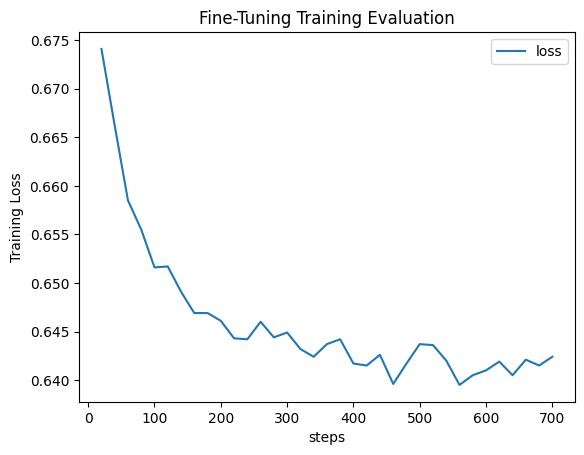

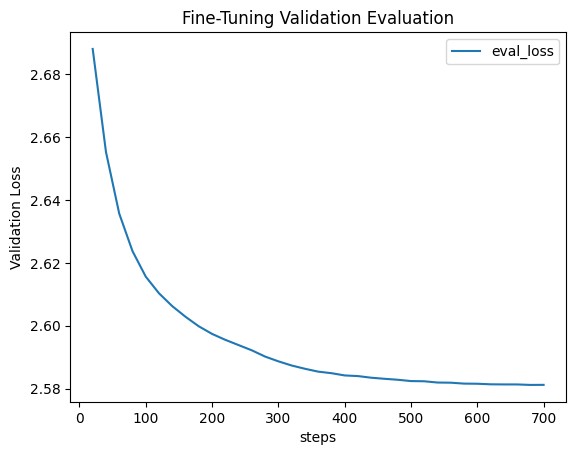

In [11]:
output=get_training_output(l_trainer, ['loss', 'eval_loss'])
#output=get_training_output(l_trainer, ['loss', 'eval_loss', 'eval_accuracy'])
output

In [12]:
l2_trainer=make_trainer(lla_lora_model, l_tokenized_stage1_train, l_tokenized_stage1_test, config,
                          SFTConfig(output_dir="test_trainer", eval_strategy="epoch",
                                    logging_strategy="steps",
                                    logging_steps=5))

In [13]:
state=initialize_heartbeat()
l2_trainer.train() 
end_heartbeat(state)

The function is running


/home/ac.cdavies/.vnv/lib/python3.12/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.638200,2.576385
2,0.637900,2.574505
3,0.637700,2.573814


The function is running
The function is running
The function is running
The function is running
The function is running
The function is running
The function is running


/home/ac.cdavies/.vnv/lib/python3.12/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


The function is running
The function is running


/home/ac.cdavies/.vnv/lib/python3.12/site-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


,loss,eval_loss
epoch,,
1.0,0.6382,2.576385
2.0,0.6379,2.574505
3.0,0.6377,2.573814


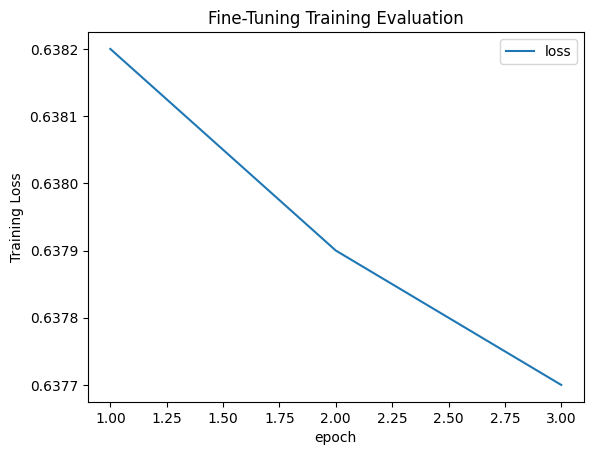

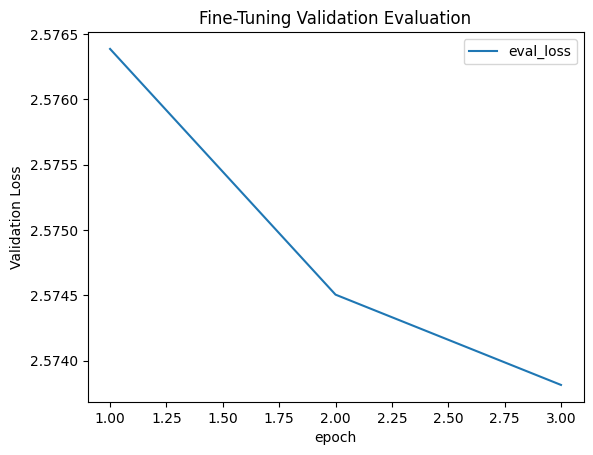

In [14]:
output=get_training_output(l2_trainer, ['loss', 'eval_loss']) # for larger numbers of parameters, don't run compute_metrics for now
#output=get_training_output(l2_trainer, ['loss', 'eval_loss', 'eval_accuracy'])
output

In [15]:
l_trainer.model.save_pretrained('./fine_tuned/lla/')
l2_trainer.model.save_pretrained('./fine_tuned/lla2/')

In [16]:
l_trainer.processing_class.save_pretrained('./fine_tuned/lla_token/')
l2_trainer.processing_class.save_pretrained('./fine_tuned/lla2_token/')

('./fine_tuned/lla2_token/tokenizer_config.json',
 './fine_tuned/lla2_token/special_tokens_map.json',
 './fine_tuned/lla2_token/tokenizer.json')